# Section 6.1 - Airbnb Amsterdam Analysis

### Chapter 1: Reviewing and cleaning 'Calendar' file: 
- This file contains data pertaining to the avilability of a particular listing across a 365 day period. If the property is available at a given point, then the advertised price is also provided.

### Chapter 2: Reviewing, cleaning and deriving new grouping variables in our primary 'listings_details' file: 
- This file contains a row of data per unique listing within the Amsterdam region - All data present on public AirBnB pages are present. This includes listing name, price, bedroom count, review score, host details etc. etc....
- New Variables generated will intially be based off the price & size of a given property based on Amsterdam averages. This may be redefined in subsequent sections depending on the needs of the analysis.



In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Creating File Pathway

path = r'C:\Users\mojos\Documents\Career Foundry Course\Data Immersion\Section 6\AirBnB Amsterdam Project\AirBnB Data'

### Chapter 1 - Calendar Overview

In [2]:
#Import CSV as Dataframe
calendar = pd.read_csv(os.path.join(path,'Raw','Calendar.csv'))

#### Preliminary consisty checks performed below to get undertsanding of data size and data types.

In [3]:
calendar.head()

,listing_id,date,available,price
0,2818,2019-12-05,f,NaN
1,73208,2019-08-30,f,NaN
2,73208,2019-08-29,f,NaN
3,73208,2019-08-28,f,NaN
4,73208,2019-08-27,f,NaN


In [4]:
calendar.shape

(7310950, 4)

In [5]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7310950 entries, 0 to 7310949
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
 2   available   object
 3   price       object
dtypes: int64(1), object(3)
memory usage: 223.1+ MB


In [6]:
calendar.describe()

,listing_id
count,7.310950e+06
mean,1.541725e+07
std,8.569190e+06
min,2.818000e+03
25%,8.187901e+06
50%,1.563049e+07
75%,2.202612e+07
max,3.058041e+07


In [7]:
calendar.isnull().sum()

listing_id          0
date                0
available           0
price         6110879
dtype: int64

#### The 6 million missing values represent rows where the listing WAS rented (not available) and as such, no price value exists. In order to try and understand how pricing fluctuates over time, we need to subset only the rows with pricing available so that we can do some future transformations using date/price  (and any other variables we develop during the course of the project).

In [8]:
#Subsetting a new dataset which we'll use moving forwards which contains ONLY rows with prices

calendar_prices = calendar[calendar['price'].isnull()==False]
calendar_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200071 entries, 240 to 7310949
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1200071 non-null  int64 
 1   date        1200071 non-null  object
 2   available   1200071 non-null  object
 3   price       1200071 non-null  object
dtypes: int64(1), object(3)
memory usage: 45.8+ MB


In [9]:
#Checking for mixed Data Types - No results found, clearing output for the sake of readability

for col in calendar_prices.columns.tolist():
    weird = (calendar_prices[[col]].applymap(type) != calendar_prices[[col]].iloc[0].apply(type)).any(axis=1)
    if len (calendar_prices[weird]) > 0:
        print(col)

C:\Users\mojos\AppData\Local\Temp\ipykernel_20984\2317224911.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (calendar_prices[[col]].applymap(type) != calendar_prices[[col]].iloc[0].apply(type)).any(axis=1)
C:\Users\mojos\AppData\Local\Temp\ipykernel_20984\2317224911.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (calendar_prices[[col]].applymap(type) != calendar_prices[[col]].iloc[0].apply(type)).any(axis=1)
C:\Users\mojos\AppData\Local\Temp\ipykernel_20984\2317224911.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (calendar_prices[[col]].applymap(type) != calendar_prices[[col]].iloc[0].apply(type)).any(axis=1)
C:\Users\mojos\AppData\Local\Temp\ipykernel_20984\2317224911.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (calendar_prices[[col]].applymap(type) != calendar_prices[[col]].iloc[

In [10]:
#Formatting on prices is incorrect - special characters preventing us from converting to 'float' dtype.
#using user defined function, because we may be likely to have to re-use them on the second dataset in a short while.

def remove_hyphen(column):
    return column.str.replace('$', '')
def remove_comma(column):
    return column.str.replace(',', '')

calendar_prices['price'] = remove_hyphen(calendar_prices['price'])
calendar_prices['price'] = remove_comma(calendar_prices['price'])


C:\Users\mojos\AppData\Local\Temp\ipykernel_20984\464882372.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_prices['price'] = remove_hyphen(calendar_prices['price'])
C:\Users\mojos\AppData\Local\Temp\ipykernel_20984\464882372.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_prices['price'] = remove_comma(calendar_prices['price'])


In [11]:
#converting identifier value to string, as it serves no numerical purpose, Price updated to float so that statistical tests can be performed
calendar_prices['listing_id'] = calendar_prices['listing_id'].astype('str')
calendar_prices['price'] = calendar_prices['price'].astype('float')
calendar_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200071 entries, 240 to 7310949
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1200071 non-null  object 
 1   date        1200071 non-null  object 
 2   available   1200071 non-null  object 
 3   price       1200071 non-null  float64
dtypes: float64(1), object(3)
memory usage: 45.8+ MB


C:\Users\mojos\AppData\Local\Temp\ipykernel_20984\345433154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_prices['listing_id'] = calendar_prices['listing_id'].astype('str')
C:\Users\mojos\AppData\Local\Temp\ipykernel_20984\345433154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_prices['price'] = calendar_prices['price'].astype('float')


In [12]:
calendar_prices.shape

(1200071, 4)

In [13]:
#Bringin descriptive stats into CSV Project plan file
calendar_prices.describe().to_clipboard()

In [14]:
#After reviewing the descriptions into excel, the 'min' value was 9, and there was only 1 instance of that occuring
#Checking frequency to see if it's an error
calendar_prices.groupby('price')['listing_id'].nunique().to_clipboard()

In [15]:
#Frequency review indicated that 21 was the lowest reoccuring price - highlighting the row with the incorrect '9' value
calender_low_price_subset = calendar_prices[calendar_prices['price']<=20]
calender_low_price_subset.head()

,listing_id,date,available,price
1277058,5865168,2018-12-11,t,9.0


In [16]:
#Reviewing listing_id details to identify potential solution
calendar_prices[calendar_prices['listing_id']=='5865168']

,listing_id,date,available,price
1276120,5865168,2019-06-30,t,180.0
1276121,5865168,2019-06-29,t,180.0
1276122,5865168,2019-06-28,t,180.0
1276123,5865168,2019-06-27,t,180.0
1276124,5865168,2019-06-26,t,180.0
...,...,...,...,...
1277052,5865168,2018-12-17,t,80.0
1277053,5865168,2018-12-16,t,80.0
1277057,5865168,2018-12-12,t,98.0
1277058,5865168,2018-12-11,t,9.0


#### The 9 value in 'price' only appears once, and is sandwhiched inbetween two instances of 98 - this looks to be a system error, and the value should subsequently be corrected back to 98.

In [17]:
#Checking & Updating output
calendar_prices.loc[calendar_prices['price']<=10, 'price'] = 98
calendar_prices[calendar_prices['listing_id']=='5865168']

,listing_id,date,available,price
1276120,5865168,2019-06-30,t,180.0
1276121,5865168,2019-06-29,t,180.0
1276122,5865168,2019-06-28,t,180.0
1276123,5865168,2019-06-27,t,180.0
1276124,5865168,2019-06-26,t,180.0
...,...,...,...,...
1277052,5865168,2018-12-17,t,80.0
1277053,5865168,2018-12-16,t,80.0
1277057,5865168,2018-12-12,t,98.0
1277058,5865168,2018-12-11,t,98.0


In [18]:
calendar_prices.describe().to_clipboard()

In [19]:
#Duplicate checks
calendar_dupes = calendar_prices[calendar_prices.duplicated()]
calendar_dupes.shape

(0, 4)

In [20]:
#Exporting prepared output, ready for next ex.
calendar_prices.to_csv(os.path.join(path,'prepared','calendar_prices.csv'))

## Chapter 2
#### Listings_details File Overview

In [21]:
lis_details = pd.read_csv(os.path.join(path,'Raw','listings_details_columns_removed.csv'))
lis_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20030 non-null  int64  
 1   name                            19992 non-null  object 
 2   summary                         19510 non-null  object 
 3   space                           14579 non-null  object 
 4   description                     19906 non-null  object 
 5   host_id                         20030 non-null  int64  
 6   host_is_superhost               20026 non-null  object 
 7   host_total_listings_count       20026 non-null  float64
 8   host_has_profile_pic            20026 non-null  object 
 9   host_identity_verified          20026 non-null  object 
 10  neighbourhood                   18377 non-null  object 
 11  neighbourhood_cleansed          20030 non-null  object 
 12  country                         

#### Preliminary review of size and columns

In [22]:
lis_details.shape

(20030, 47)

In [23]:
lis_details.head()

,id,name,summary,space,description,host_id,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,2818,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,3159,t,1.0,t,f,...,10.0,10.0,10.0,9.0,10.0,f,t,strict_14_with_grace_period,1,2.10
1,3209,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,3806,f,1.0,t,t,...,9.0,10.0,10.0,9.0,9.0,f,f,moderate,1,1.03
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",59484,f,2.0,t,f,...,10.0,9.0,9.0,10.0,9.0,f,f,strict_14_with_grace_period,2,2.18
3,25428,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",56142,f,2.0,t,f,...,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,2,0.09
4,27886,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,97647,t,1.0,t,t,...,10.0,10.0,10.0,10.0,10.0,f,t,strict_14_with_grace_period,1,2.03


In [24]:
lis_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20030 non-null  int64  
 1   name                            19992 non-null  object 
 2   summary                         19510 non-null  object 
 3   space                           14579 non-null  object 
 4   description                     19906 non-null  object 
 5   host_id                         20030 non-null  int64  
 6   host_is_superhost               20026 non-null  object 
 7   host_total_listings_count       20026 non-null  float64
 8   host_has_profile_pic            20026 non-null  object 
 9   host_identity_verified          20026 non-null  object 
 10  neighbourhood                   18377 non-null  object 
 11  neighbourhood_cleansed          20030 non-null  object 
 12  country                         

In [25]:
# Dropping Unnecessary Columns:
listings = lis_details.drop(columns = ['description','bathrooms','space','host_has_profile_pic','host_identity_verified','neighbourhood','country','calendar_updated','has_availability','extra_people','availability_30','availability_60','availability_90','requires_license','cancellation_policy','calculated_host_listings_count','host_total_listings_count','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication'])


In [26]:
#Checking for mixed Data Types
for col in listings.columns.tolist():
    weird = (listings[[col]].applymap(type) != listings[[col]].iloc[0].apply(type)).any(axis=1)
    if len (listings[weird]) > 0:
        print(col)

name
summary
host_is_superhost


C:\Users\mojos\AppData\Local\Temp\ipykernel_20984\532259557.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (listings[[col]].applymap(type) != listings[[col]].iloc[0].apply(type)).any(axis=1)
C:\Users\mojos\AppData\Local\Temp\ipykernel_20984\532259557.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (listings[[col]].applymap(type) != listings[[col]].iloc[0].apply(type)).any(axis=1)
C:\Users\mojos\AppData\Local\Temp\ipykernel_20984\532259557.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (listings[[col]].applymap(type) != listings[[col]].iloc[0].apply(type)).any(axis=1)
C:\Users\mojos\AppData\Local\Temp\ipykernel_20984\532259557.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (listings[[col]].applymap(type) != listings[[col]].iloc[0].apply(type)).any(axis=1)
C:\Users\mojos\AppData\Local\Tem

In [27]:
#Updating special character formatting in prices in the same vein as the 'calendar' file above

listings['price'] = remove_hyphen(listings['price'])
listings['price'] = remove_comma(listings['price'])

#Correcting Data Types

listings['id'] = listings['id'].astype('str')
listings['host_id'] = listings['host_id'].astype('str')
listings['price'] = listings['price'].astype('float')
listings['name'] = listings['name'].astype('str')
listings['summary'] = listings['summary'].astype('str')
listings['host_is_superhost'] = listings['host_is_superhost'].astype('str')
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      20030 non-null  object 
 1   name                    20030 non-null  object 
 2   summary                 20030 non-null  object 
 3   host_id                 20030 non-null  object 
 4   host_is_superhost       20030 non-null  object 
 5   neighbourhood_cleansed  20030 non-null  object 
 6   latitude                20030 non-null  float64
 7   longitude               20030 non-null  float64
 8   property_type           20030 non-null  object 
 9   room_type               20030 non-null  object 
 10  accommodates            20030 non-null  int64  
 11  bedrooms                20022 non-null  float64
 12  beds                    20023 non-null  float64
 13  bed_type                20030 non-null  object 
 14  amenities               20030 non-null

In [28]:
listings.isnull().sum()

id                           0
name                         0
summary                      0
host_id                      0
host_is_superhost            0
neighbourhood_cleansed       0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bedrooms                     8
beds                         7
bed_type                     0
amenities                    0
price                        0
guests_included              0
minimum_nights               0
maximum_nights               0
availability_365             0
number_of_reviews            0
review_scores_rating      2639
review_scores_location    2660
review_scores_value       2659
instant_bookable             0
reviews_per_month         2406
dtype: int64

#### Creating a flag for listings which are missing review scores - I don't want to outright delete any missing values - Listings which don't have reviews will ofcourse be removed for review based analysis, however, overall listing details can still be used to assess neighbourhood pricing & availability analysis as outlined in the project overview doc.

#### If we were to outright remove these listings from analysis, we would have lost over 10% of the available data


In [29]:
listings['rated'] = np.where(np.isnan(listings['review_scores_rating'].values),'False','True')

#validating new column
listings['rated'].value_counts(dropna = False)

rated
True     17391
False     2639
Name: count, dtype: int64

In [30]:
##removing the 8 x nan Bedroom values & the nan beds
listings_2 = listings[listings['bedrooms'].isnull()==False]
listings_3 = listings_2[listings_2['beds'].isnull()==False]
listings_3.shape

(20016, 27)

In [31]:
listings_3.isnull().sum()

id                           0
name                         0
summary                      0
host_id                      0
host_is_superhost            0
neighbourhood_cleansed       0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bedrooms                     0
beds                         0
bed_type                     0
amenities                    0
price                        0
guests_included              0
minimum_nights               0
maximum_nights               0
availability_365             0
number_of_reviews            0
review_scores_rating      2637
review_scores_location    2658
review_scores_value       2657
instant_bookable             0
reviews_per_month         2404
rated                        0
dtype: int64

In [32]:
#Subsetting the result, so that we are only reviewing listings which have been reviewed, and can there for be assessed:
listings_reviewed =  listings_3[listings_3['rated']=='True']
listings_reviewed.shape

(17379, 27)

In [33]:
listings_reviewed.isnull().sum()

id                         0
name                       0
summary                    0
host_id                    0
host_is_superhost          0
neighbourhood_cleansed     0
latitude                   0
longitude                  0
property_type              0
room_type                  0
accommodates               0
bedrooms                   0
beds                       0
bed_type                   0
amenities                  0
price                      0
guests_included            0
minimum_nights             0
maximum_nights             0
availability_365           0
number_of_reviews          0
review_scores_rating       0
review_scores_location    22
review_scores_value       21
instant_bookable           0
reviews_per_month          0
rated                      0
dtype: int64

In [34]:
#Subsetting & reviewing final missing review details before moving on to exporting
remaining_nan_reviews = listings_reviewed[listings_reviewed.isnull().any(axis=1)]
remaining_nan_reviews.head(50)

,id,name,summary,host_id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,rated
3803,6344284,Cozy Amsterdam Apartment For Two,We offer our nice & cozy apartment in the cent...,19364602,f,Westerpark,52.387509,4.880308,Apartment,Entire home/apt,...,3,1125,0,1,80.0,NaN,NaN,f,0.02,True
6208,10137549,Spacious apartment in city centre,Lovely apartment in the upcoming neighborhood ...,14118176,f,De Baarsjes - Oud-West,52.369193,4.860728,Apartment,Entire home/apt,...,2,1125,0,1,100.0,NaN,NaN,f,0.03,True
6365,10489911,"Luxury apartment in ""Rivierenbuurt""",Beautiful new apartment with rooftop terrace. ...,22928421,f,De Pijp - Rivierenbuurt,52.343758,4.906487,Apartment,Entire home/apt,...,2,21,0,1,100.0,NaN,NaN,f,0.04,True
6817,11486321,Renovated apartement,I just renovated my appartement to a double be...,3256150,f,Zuid,52.345079,4.861024,Apartment,Entire home/apt,...,2,1125,11,1,80.0,NaN,NaN,f,0.05,True
6980,11732452,Comfortable Jordaan appartment,Cosy 64m2 appartment located in the heart of t...,62403836,f,Centrum-West,52.378056,4.883645,Apartment,Private room,...,1,1125,0,7,80.0,NaN,NaN,t,0.22,True
8330,13576855,Cozy Room close to the City Centre,"Welcome to our amazing and sunny apartment, in...",37158057,f,De Baarsjes - Oud-West,52.368478,4.865663,Apartment,Private room,...,1,1125,0,2,100.0,8.0,NaN,f,0.07,True
8795,13955824,Authentic cozy home in Amsterdam North,Our authentic & cozy home is perfectly suited ...,83110320,f,Oud-Noord,52.391086,4.908351,House,Entire home/apt,...,3,4,0,1,100.0,NaN,10.0,f,0.04,True
8931,14067949,120m2. Third floor+attic. Cosy.,"Near Zuid WTC, Amsterdamse bos (biggest park o...",84478994,f,Buitenveldert - Zuidas,52.324447,4.873010,Apartment,Entire home/apt,...,7,15,0,1,100.0,NaN,10.0,f,0.04,True
9079,14210563,Spacious apartment near the Amsterdam Rai,This large apartment has all the comfort neede...,86272777,f,De Pijp - Rivierenbuurt,52.345316,4.891995,Apartment,Entire home/apt,...,2,1125,0,1,100.0,NaN,NaN,f,0.04,True
9147,14275520,Family home with garden on canal in Amsterdam,Nice family home in Amsterdam with canal garde...,19121390,f,IJburg - Zeeburgereiland,52.352625,5.006623,House,Entire home/apt,...,4,21,0,1,80.0,NaN,NaN,f,0.04,True


In [35]:
listings_reviewed.dropna(inplace=True)
listings_reviewed.shape

C:\Users\mojos\AppData\Local\Temp\ipykernel_20984\1496344813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_reviewed.dropna(inplace=True)


(17356, 27)

#### The dropna function removed the expected quantity of rows with missing data, and we have a subset of the data to revisit later if required (remaining_nan_reviews)

In [36]:
listings_reviewed.isnull().sum()

id                        0
name                      0
summary                   0
host_id                   0
host_is_superhost         0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bedrooms                  0
beds                      0
bed_type                  0
amenities                 0
price                     0
guests_included           0
minimum_nights            0
maximum_nights            0
availability_365          0
number_of_reviews         0
review_scores_rating      0
review_scores_location    0
review_scores_value       0
instant_bookable          0
reviews_per_month         0
rated                     0
dtype: int64

In [37]:
listings_reviewed.describe()

,latitude,longitude,accommodates,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_location,review_scores_value,reviews_per_month
count,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000,17356.000000
mean,52.365396,4.888888,2.872263,1.433107,1.835965,148.497522,1.500115,3.167435,622.649977,59.395310,24.846278,94.854056,9.421583,9.175040,1.072811
std,0.015823,0.035246,1.284166,0.867856,1.357799,135.302900,0.940310,12.504979,541.851939,102.586912,45.566163,6.636581,0.727937,0.805564,1.338741
min,52.289274,4.763264,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,20.000000,2.000000,2.000000,0.010000
25%,52.355397,4.863701,2.000000,1.000000,1.000000,97.000000,1.000000,2.000000,21.000000,0.000000,4.000000,93.000000,9.000000,9.000000,0.270000
50%,52.364830,4.886293,2.000000,1.000000,1.000000,125.000000,1.000000,2.000000,1124.000000,4.000000,11.000000,97.000000,10.000000,9.000000,0.630000
75%,52.375121,4.908177,4.000000,2.000000,2.000000,175.000000,2.000000,3.000000,1125.000000,68.000000,25.000000,100.000000,10.000000,10.000000,1.240000
max,52.424713,5.027689,17.000000,12.000000,32.000000,8500.000000,16.000000,1001.000000,9999.000000,365.000000,695.000000,100.000000,10.000000,10.000000,11.850000


In [38]:
#Groupby view to be exported to excel as part of consistency and wrangling summary / project plan overview
listings_reviewed.groupby('price')['id'].nunique().to_clipboard()

In [39]:
#Based off the above groupby review, there were a few instances of unreasonably low prices which need to be reviewed.
listings_reviewed[listings_reviewed['price']<=20].to_clipboard()

In [40]:
#Following on from clipboard review, there are 2 listings which are at $0, which by my judgment should be removed.
listings_reviewed2 = listings_reviewed[listings_reviewed['price']!=0]
listings_reviewed2.shape
#Whilst there are other properties between 10-20 Euros, it's not valid to simply remove them at this stage, because we don't know exactly what they are supposed to represent

(17354, 27)

#### Last few steps for this initial data prep is to define some initial groupings that we can use for our analysis in the next steps. This requires the use of Boxplots to define price and property size groupings (e.g low price, average, high price - Small rental, average rental, large rental. etc.)

In [41]:
listings_reviewed2['price'].describe()

count    17354.000000
mean       148.514636
std        135.301304
min          8.000000
25%         97.000000
50%        125.000000
75%        175.000000
max       8500.000000
Name: price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x200cb2a0190>,
 'caps': [<matplotlib.lines.Line2D at 0x200d2d4c510>,
 'boxes': [<matplotlib.lines.Line2D at 0x200d5867150>],
 'medians': [<matplotlib.lines.Line2D at 0x200d2d4d4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x200d9795a90>],
 'means': []}

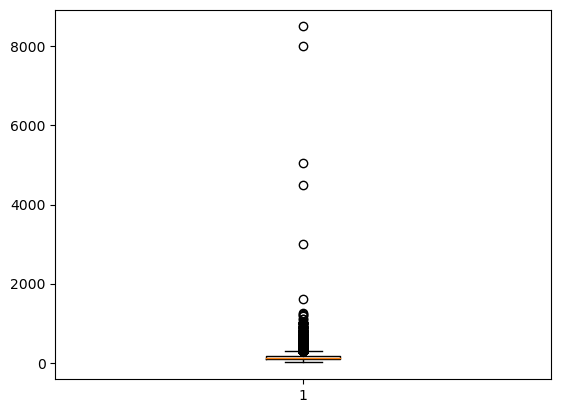

In [42]:
plt.boxplot(listings_reviewed2['price'])

### Price variables to defined based on quartiles as reviewed in the .describe command above.

In [43]:
listings_reviewed2.loc[listings_reviewed2['price'] > 175, 'pricing_tier'] = 'High-End'
listings_reviewed2.loc[(listings_reviewed2['price'] <= 175) & (listings_reviewed2['price'] > 125), 'pricing_tier'] = 'Mid-High-End' 
listings_reviewed2.loc[(listings_reviewed2['price'] <= 125) & (listings_reviewed2['price'] > 97), 'pricing_tier'] = 'Mid-Low-End'
listings_reviewed2.loc[listings_reviewed2['price'] <= 97, 'pricing_tier'] = 'Low'
listings_reviewed2['pricing_tier'].value_counts(dropna = False)

C:\Users\mojos\AppData\Local\Temp\ipykernel_20984\1357748525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_reviewed2.loc[listings_reviewed2['price'] > 175, 'pricing_tier'] = 'High-End'


pricing_tier
Mid-High-End    4507
Mid-Low-End     4504
Low             4368
High-End        3975
Name: count, dtype: int64

### Despite the long tail, the frequency of values in the 'accommodates' column is extremely concentrated between 2-4. The assumption here is that most listings would contain atleast 1 double (or larger) bed, capable of sleeping one couple with either a sofa or a pull-out sofabed to act as a second bed for an individual or couple.
### As a result, I've decided to create naming conventions based on potential groupings size. This means that properties which can accomodate 1-2 guests are small group, 3-4 medium group, 5+ is large group.

In [44]:
listings_reviewed2['accommodates'].describe()

count    17354.000000
mean         2.872191
std          1.284211
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         17.000000
Name: accommodates, dtype: float64

In [45]:
listings_reviewed2['accommodates'].value_counts(dropna = False)

accommodates
2     9519
4     5285
3     1449
1      318
5      305
6      302
8       70
7       44
16      21
10      15
12      14
9        4
14       4
11       3
17       1
Name: count, dtype: int64

In [46]:
listings_reviewed2.loc[listings_reviewed2['accommodates'] > 4, 'group_size'] = 'Large'
listings_reviewed2.loc[(listings_reviewed2['accommodates'] <= 4) & (listings_reviewed2['accommodates'] > 2), 'group_size'] = 'Medium'
listings_reviewed2.loc[listings_reviewed2['accommodates'] <= 2, 'group_size'] = 'Small'
listings_reviewed2['group_size'].value_counts(dropna = False)

C:\Users\mojos\AppData\Local\Temp\ipykernel_20984\2698927239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_reviewed2.loc[listings_reviewed2['accommodates'] > 4, 'group_size'] = 'Large'


group_size
Small     9837
Medium    6734
Large      783
Name: count, dtype: int64

In [47]:
listings_reviewed2 ['groupsize_pricing_combined'] = listings_reviewed2['group_size'] + [' '] + listings_reviewed2['pricing_tier']
listings_reviewed2['groupsize_pricing_combined'].value_counts(dropna = False)

C:\Users\mojos\AppData\Local\Temp\ipykernel_20984\2536444906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_reviewed2 ['groupsize_pricing_combined'] = listings_reviewed2['group_size'] + [' '] + listings_reviewed2['pricing_tier']


groupsize_pricing_combined
Small Low              3639
Small Mid-Low-End      3191
Medium High-End        2688
Small Mid-High-End     2275
Medium Mid-High-End    2098
Medium Mid-Low-End     1248
Small High-End          732
Medium Low              700
Large High-End          555
Large Mid-High-End      134
Large Mid-Low-End        65
Large Low                29
Name: count, dtype: int64

In [48]:
listings_reviewed2.describe().to_clipboard()

In [49]:
listings_reviewed2.shape

(17354, 30)

In [50]:
#No dupes present in final exported CSV.
listings_reviewed2_dupes = listings_reviewed2[listings_reviewed2.duplicated()]
listings_reviewed2_dupes.shape

(0, 30)

In [51]:
listings_reviewed3 = listings_reviewed2[listings_reviewed2['price']<=1000]
listings_reviewed3.to_clipboard()

In [52]:
listings_reviewed3.shape

(17341, 30)

<Axes: ylabel='Frequency'>

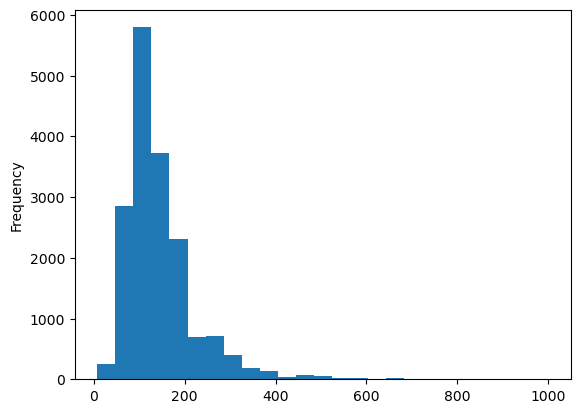

In [53]:
listings_reviewed3['price'].plot.hist(bins = 25)

In [54]:
#exporting initial 'clean' version of the file.
listings_reviewed2.to_csv(os.path.join(path,'prepared','listings_reviewed.csv'))
listings_reviewed3.to_csv(os.path.join(path,'prepared','listings_sub1000.csv'))

In [55]:
#Performing a merge onto calendar so as to bring in some categorical details such as neighbourhood and combined price / room type
calendar_prices.rename(columns = {'listing_id':'id'},inplace=True)
df_merged = calendar_prices.merge(listings_reviewed2[['id', 'neighbourhood_cleansed','groupsize_pricing_combined']], on = 'id', how = 'left',indicator=True)

C:\Users\mojos\AppData\Local\Temp\ipykernel_20984\3824028640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_prices.rename(columns = {'listing_id':'id'},inplace=True)


In [56]:
df_merged['_merge'].value_counts()

_merge
both          1030539
left_only      169532
right_only          0
Name: count, dtype: int64

In [57]:
n = len(pd.unique(df_merged['id']))
print("No.of.unique values :",n)

No.of.unique values : 10686


In [58]:
df_merged_missing = df_merged[df_merged['_merge']=='left_only']
n = len(pd.unique(df_merged_missing['id']))
print("No.of.unique values :",n)

No.of.unique values : 1318


In [59]:
df_merged_full = df_merged[df_merged['_merge']=='both']
df_merged_full = df_merged_full.drop(columns = ['_merge'])
df_merged_full.to_csv(os.path.join(path,'Prepared','calendar_w_catagories.csv'))